In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img):
    fig = plt.figure(figsize=(1, 1))
    # fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, cmap="gray")
    plt.show()

def draw_lines(img, points):
    return_img = np.copy(img)
    y0, x0 = points[-1]
    for y1, x1 in points:
        cv2.line(return_img, (y0,x0), (y1,x1), [0,255,0])
        y0, x0 = y1, x1

    for y0, x0 in points:
        return_img[x0, y0] = [255,0,0]
    return return_img
    

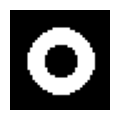

红色是点，绿色是线 返回结果中同样是纵坐标在前，横坐标在后
周长 85.25483322143555
面积 524.0


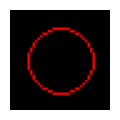

周长 81.8885440826416
面积 516.0


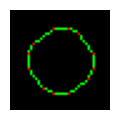

轮廓是否是凸 True
[10, 15] 是否在轮廓中 1.0
[15, 10] 是否在轮廓中 1.0


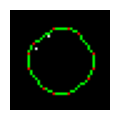

In [41]:
'''
approxPolyDP 和 轮廓的一些函数(周长、面积等)
'''
img = np.zeros((40, 40), dtype=np.uint8)
cv2.circle(img, (20, 20), 10, 255, 5)
show_image(img)

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
point_set = contours[0][:, 0]

now_img = cv2.cvtColor(np.zeros_like(img), cv2.COLOR_GRAY2BGR)

print('红色是点，绿色是线', '返回结果中同样是纵坐标在前，横坐标在后')
print('周长', cv2.arcLength(point_set, closed=True))
print('面积', cv2.contourArea(point_set))
show_image(draw_lines(now_img, point_set))

approx_points = cv2.approxPolyDP(point_set, 1, True)[:, 0]
print('周长', cv2.arcLength(approx_points, closed=True))
print('面积', cv2.contourArea(approx_points))
show_image(draw_lines(now_img, approx_points))

print('轮廓是否是凸', cv2.isContourConvex(approx_points))

now_points = [[10, 15], [15, 10]]
for onep in now_points:
    now_img[onep[0], onep[1]] = [255, 255, 255]
    # measureDist: False 只返回 -1,0,+1；True 则返回到轮廓的最近距离
    print(f'{onep} 是否在轮廓中', cv2.pointPolygonTest(approx_points, onep, measureDist=False))
show_image(draw_lines(now_img, approx_points))

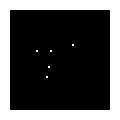

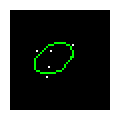

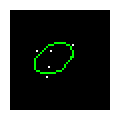

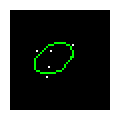

In [42]:
'''
点集各种 Fit 函数
'''

img = np.zeros((50, 50), dtype=np.uint8)
point_set = np.array([[20, 20], [20, 13], [28, 19], [33, 18], [17, 31]])
for onep in point_set:
    img[onep[0], onep[1]] = 255
show_image(img)

# important: 点集需要纵坐标在前面！！！
point_set[:, [0, 1]] = point_set[:, [1, 0]]

# # 最小矩形（正方向）
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# x0,y0,w0,h0 = cv2.boundingRect(point_set)
# cv2.rectangle(now_img, (x0,y0), (x0+w0,y0+h0), [0,255,0])
# show_image(now_img)

# # 最小矩形（任意方向）
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# box = cv2.boxPoints(cv2.minAreaRect(point_set))
# box = box.astype(int) # 这句很重要，坐标转为 int
# cv2.drawContours(now_img, [box], -1, (0, 255, 0), 1)
# show_image(now_img)

# # 最小凸包
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# hull = cv2.convexHull(point_set)
# hull = hull.astype(int) # 这句很重要，坐标转为 int
# cv2.drawContours(now_img, [hull], -1, (0, 255, 0), 1)
# show_image(now_img)

# # 最小三角形
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# area, triangle  = cv2.minEnclosingTriangle(point_set)
# triangle = triangle.astype(int)
# cv2.drawContours(now_img, [triangle], -1, (0, 255, 0), 1)
# show_image(now_img)

# 最小椭圆
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
ellipse = cv2.fitEllipse(point_set)
cv2.ellipse(now_img, ellipse, (0,255,0), 1)
show_image(now_img)

# 最小椭圆
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
ellipse = cv2.fitEllipseAMS(point_set)
cv2.ellipse(now_img, ellipse, (0,255,0), 1)
show_image(now_img)

# 最小椭圆
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
ellipse = cv2.fitEllipseDirect(point_set)
cv2.ellipse(now_img, ellipse, (0,255,0), 1)
show_image(now_img)


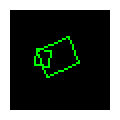

[[[14.716984  19.339624 ]]

 [[20.000002  20.000002 ]]

 [[19.000002  28.000002 ]]

 [[15.9292965 27.616165 ]]

 [[13.000004  20.000002 ]]]
------------------
[[[15.929297 27.616163]]

 [[13.000004 20.000002]]

 [[14.716984 19.339624]]

 [[20.000002 20.000002]]

 [[19.000002 28.000002]]]


In [43]:
'''
相交
'''
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
rect1 = cv2.minAreaRect(point_set[0:3])
rect2 = cv2.minAreaRect(point_set[1:5])
cv2.drawContours(now_img, [cv2.boxPoints(rect1).astype(int)], -1, (0, 255, 0), 1)
cv2.drawContours(now_img, [cv2.boxPoints(rect2).astype(int)], -1, (0, 255, 0), 1)
show_image(now_img)

# 直接使用矩形相交方法
is_intersect, intersect_points1 = cv2.rotatedRectangleIntersection(rect1, rect2)

# 求矩形的点，然后使用轮廓相交方法
points1 = cv2.RotatedRect(*rect1).points()
points2 = cv2.RotatedRect(*rect2).points()
area, intersect_points2 = cv2.intersectConvexConvex(points1, points2)

print(intersect_points1)
print('------------------')
print(intersect_points2)